# **Practical Lab 2:** 
- # Multivariate Linear Regression, Non-Parametric Models and Cross-Validation
- # Name: Athul Raj
- # Student ID: 8955725

# **Introduction**
## **Part - 1**

- Importing the necessary libraries

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

### 1.1 Loading the dataset 

In [70]:
# Import the required library
from sklearn import datasets

diabetes_data = datasets.load_diabetes()  # This will load the dataset

print(diabetes_data.DESCR)  # This will get description on each function or features of the dataset


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [71]:

data_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)  # Converting it into data frame
data_df['target'] = diabetes_data.target

data_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 1.2 Objective of the report

- Using the Scikit-Learn diabetes dataset, the goal is to forecast the course of diabetes one year after baseline. The disease progression measure, which shows how diabetes has progressed over a year, is the target variable. Baseline health measures including age, BMI, blood pressure, and blood serum values are among the independent variables. Healthcare providers can use this prediction model to identify patients who may benefit from early management for diabetic complications.

# **Data Exploration**
### 1.3 Exploratory Data Analysis

### 1.3.1 Descriptive Statistics

In [72]:

print(data_df.describe()) # Display descriptive statistics of the dataset


                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

### 1.3.2 Histograms

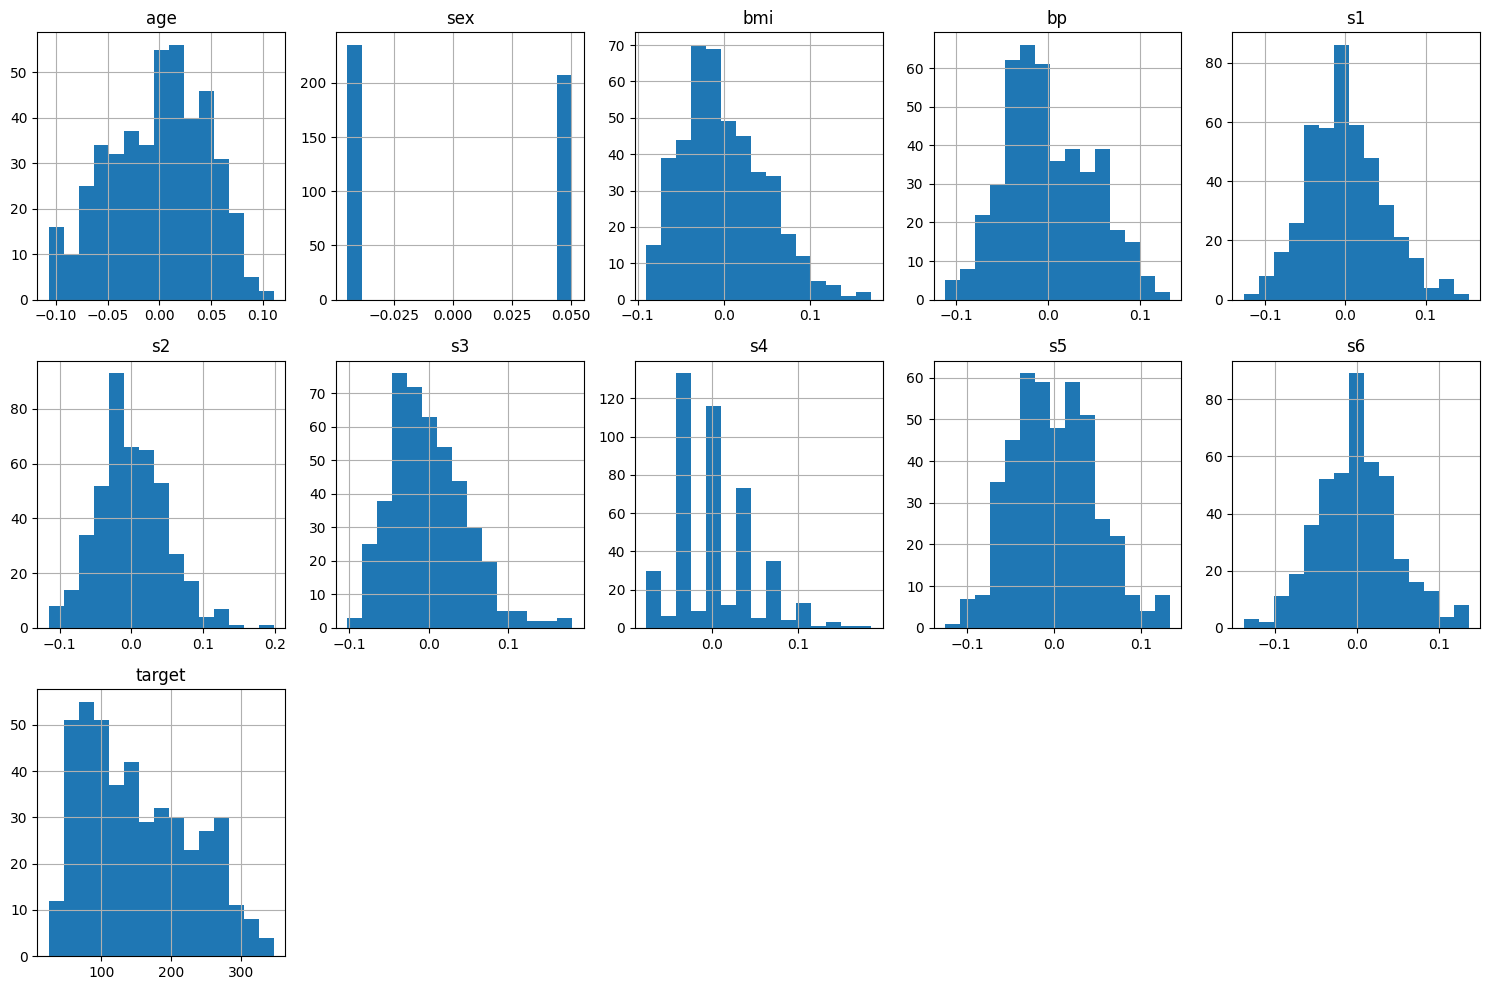

In [73]:

data_df.hist(bins=15, figsize=(15, 10), layout=(3, 5)) # Plot histograms for each feature and the target variable
plt.tight_layout()
plt.show()


### 1.3.3 Scatter Plots

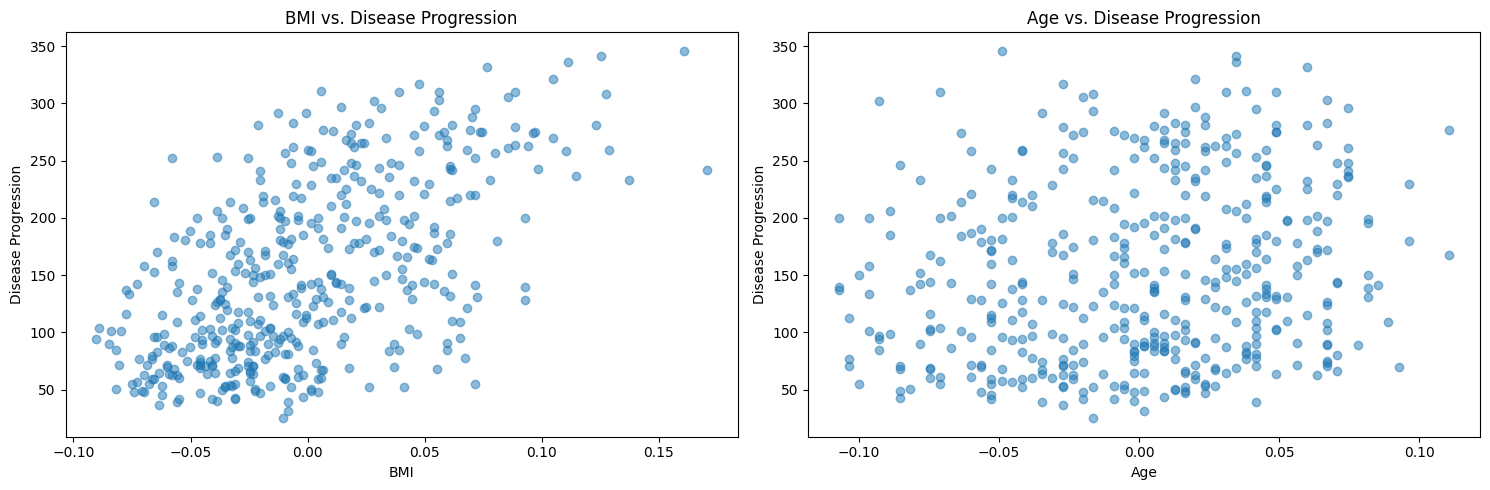

In [74]:

plt.figure(figsize=(15, 5))

# Scatter plot for BMI vs. disease progression
plt.subplot(1, 2, 1)
plt.scatter(data_df['bmi'], data_df['target'], alpha=0.5)  # Choosing BMI as one of the feature
plt.title('BMI vs. Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')

# Scatter plot for Age vs. disease progression
plt.subplot(1, 2, 2)
plt.scatter(data_df['age'], data_df['target'], alpha=0.5)  #  Choosing age as another feature
plt.title('Age vs. Disease Progression')
plt.xlabel('Age')
plt.ylabel('Disease Progression')

plt.tight_layout()
plt.show()


### 1.3.4 Coorelation matrix

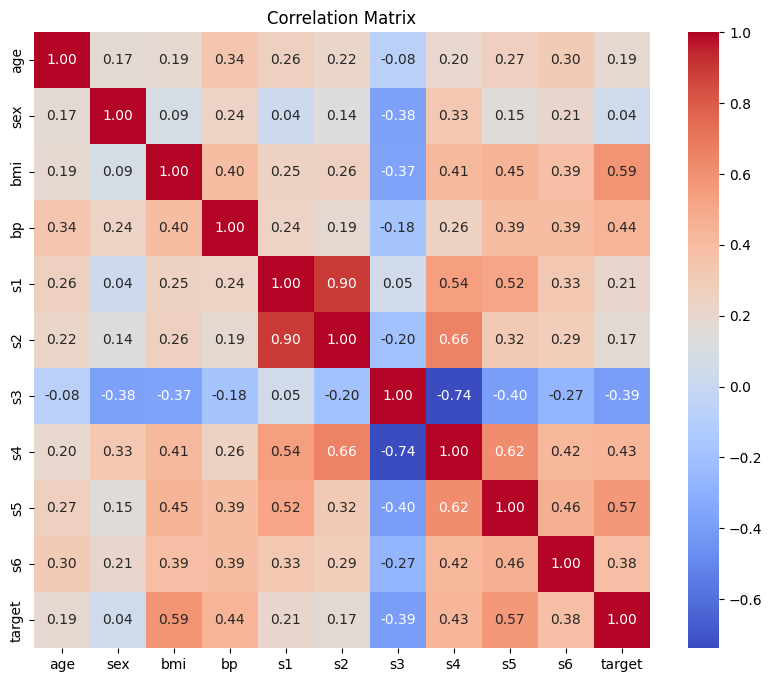

In [75]:

correlation_matrix = data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


### 1.3.5 Insights

1. Feature Distributions: The fact that each feature seems to have a fairly normal distribution with a centering point of zero suggests that the data is standardized. Our modeling efforts will benefit from this scaling, particularly for methods like regression that are sensitive to feature magnitudes.

2. Target variable: The target variable ("disease progression one year after baseline") shows significant variation, with a mean of 152 and a wide range from 25 to 346. This spread suggests a diversity in disease progression, likely impacted by various patient-specific factors, highlighting the potential complexity in modeling.

3. Feature correlations: The correlation matrix reveals notable correlations between certain features and the target variable:
- BMI has a moderately positive correlation with disease progression, suggesting that higher BMI values may contribute to increased progression levels.
- Other features (e.g., s5, bp) also display mild to moderate positive correlations with the target, implying potential health-related risk factors.

4. Feature Interdependencies: Certain feature pairs, including s3 and s5, show moderate correlations that could point to multi collinearity. Regularization or dimensionality reduction may be worthwhile to take into consideration, as this could affect the stability of regression models.

5. Visual Observations:
- Scatter plots show linear and non-linear relationships between certain features and the target variable, which could support the use of polynomial regression to capture any non-linear dependencies.
- The balanced character of each feature is reflected in histograms, which support the consistent scaling for all variables.




# **Data preprocessing**
### 1.4 Data cleaning

In [76]:

missing_values = data_df.isnull().sum() # Check for missing values in the dataset
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


### 1.5 Splitting the data

In [77]:
from sklearn.model_selection import train_test_split


X = data_df.drop(columns='target') # Split the dataset into features (X) and target (y)
y = data_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42) # Splitting the data into training (75%) and temporary set (25% for validation and testing)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.60, random_state=42) # Splitting the temporary set into validation (40%) and test set (60%) from the temporary 25%

# Display the size of each set
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 331 samples
Validation set: 44 samples
Test set: 67 samples


# **Modelling**
## **Part - 2**

### 2.6 Building models: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 

In [78]:


# Initialize lists to store the results
degrees = np.arange(0, 6)  # Degrees from 0 to 5
results = []

# Loop over each degree
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_bmi = X_train[['bmi']]  # Use only the BMI feature
    X_poly = poly.fit_transform(X_bmi)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y_train)
    
    # Predictions on the training set
    y_train_pred = model.predict(X_poly)
    
    # Predictions on the validation set
    X_val_poly = poly.transform(X_val[['bmi']])
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate metrics for training and validation sets
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    
    # Calculate MAPE (Mean Absolute Percentage Error)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    
    # Store the results
    results.append({
        'Degree': degree,
        'R2_Train': r2_train,
        'R2_Validation': r2_val,
        'MAE_Train': mae_train,
        'MAE_Validation': mae_val,
        'MAPE_Train': mape_train,
        'MAPE_Validation': mape_val
    })

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)
print(results_df)


   Degree  R2_Train  R2_Validation  MAE_Train  MAE_Validation  MAPE_Train  \
0       0  0.000000      -0.106957  66.201641       66.057059   62.826669   
1       1  0.349672       0.331264  52.287739       47.208472   48.362886   
2       2  0.350764       0.331631  52.207314       47.213700   48.298534   
3       3  0.350774       0.331638  52.198968       47.185414   48.280744   
4       4  0.353014       0.340758  52.092653       46.090118   48.053266   
5       5  0.354100       0.349881  52.059191       45.462121   48.004022   

   MAPE_Validation  
0        71.263880  
1        47.060009  
2        47.239667  
3        47.222673  
4        46.050330  
5        45.175275  


### 2.7 Comparing the models

In [79]:
# Display the summary table
results_df[['Degree', 'R2_Train', 'MAE_Train', 'MAPE_Train', 'R2_Validation', 'MAE_Validation', 'MAPE_Validation']]


,Degree,R2_Train,MAE_Train,MAPE_Train,R2_Validation,MAE_Validation,MAPE_Validation
0,0,0.000000,66.201641,62.826669,-0.106957,66.057059,71.263880
1,1,0.349672,52.287739,48.362886,0.331264,47.208472,47.060009
2,2,0.350764,52.207314,48.298534,0.331631,47.213700,47.239667
3,3,0.350774,52.198968,48.280744,0.331638,47.185414,47.222673
4,4,0.353014,52.092653,48.053266,0.340758,46.090118,46.050330
5,5,0.354100,52.059191,48.004022,0.349881,45.462121,45.175275


### 2.8 Identifying the best model

In [80]:
# Identify the best model based on validation metrics
best_model_index = results_df['R2_Validation'].idxmax()  # Index of the model with the highest R-squared
best_model = results_df.iloc[best_model_index]

# Display the best model
print("Best Model:")
print(best_model)


Best Model:
Degree              5.000000
R2_Train            0.354100
R2_Validation       0.349881
MAE_Train          52.059191
MAE_Validation     45.462121
MAPE_Train         48.004022
MAPE_Validation    45.175275
Name: 5, dtype: float64


### 2.9 Evaluating the models on test set

In [81]:
# Refit the best model on the entire training set (training + validation)
degree_of_best_model = int(best_model['Degree'])  # Convert to integer
poly = PolynomialFeatures(degree=degree_of_best_model)

# Create polynomial features for training data
X_train_bmi = X_train[['bmi']]
X_train_poly = poly.fit_transform(X_train_bmi)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
X_test_poly = poly.transform(X_test[['bmi']])
y_test_pred = model.predict(X_test_poly)

# Calculate metrics for the test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate MAPE for the test set
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Display the test set results
print("Test Set Performance:")
print(f"R-Squared: {r2_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")


Test Set Performance:
R-Squared: 0.2667
Mean Absolute Error (MAE): 51.7503
Mean Absolute Percentage Error (MAPE): 43.03%


### 2.10 Plotting the train , validation and test data points

c:\Users\athul\Documents\aiml2024\CSCN8010_clasical_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


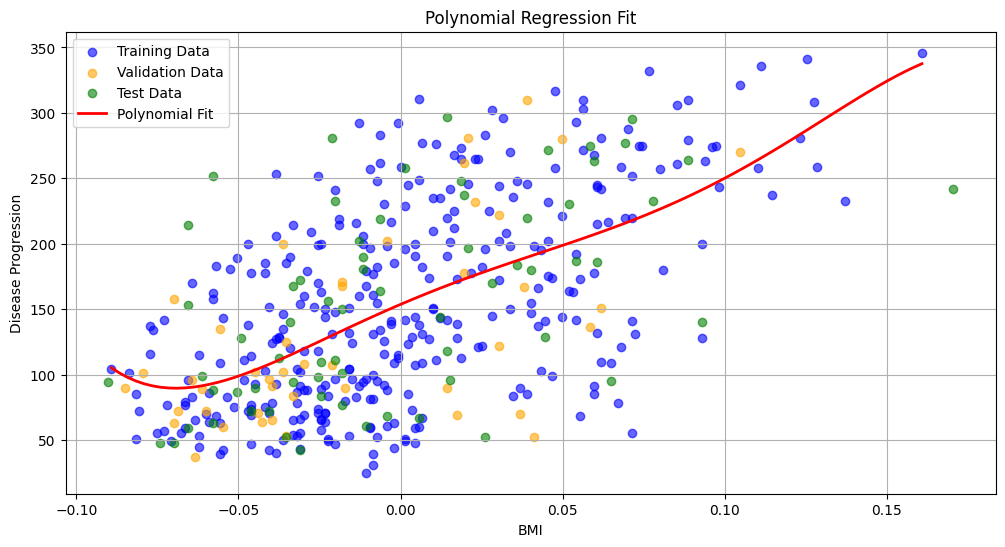

In [82]:


# Generate a range of values for BMI for plotting the curve
bmi_range = np.linspace(X_train['bmi'].min(), X_train['bmi'].max(), 100).reshape(-1, 1)

# Transform the BMI range using the polynomial features
bmi_range_poly = poly.transform(bmi_range)

# Predict the disease progression using the model
progression_curve = model.predict(bmi_range_poly)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the training data
plt.scatter(X_train['bmi'], y_train, color='blue', label='Training Data', alpha=0.6)
# Plot the validation data
plt.scatter(X_val['bmi'], y_val, color='orange', label='Validation Data', alpha=0.6)
# Plot the test data
plt.scatter(X_test['bmi'], y_test, color='green', label='Test Data', alpha=0.6)

# Plot the polynomial regression curve
plt.plot(bmi_range, progression_curve, color='red', linewidth=2, label='Polynomial Fit')

# Adding labels and title
plt.title('Polynomial Regression Fit')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid()
plt.show()


### 2.11 Equation of the best model

- Equation of the Best Model:
y = b0 + b1 * x + b2 * x^2 + ... + bn * x^n


In [83]:
# Get the coefficients of the model
intercept = model.intercept_
coefficients = model.coef_

# Construct the equation string
equation = f"y = {intercept:.2f}"

# Add each term of the polynomial
for i in range(1, len(coefficients)):
    equation += f" + {coefficients[i]:.2f} * x^{i}"

print("Equation of the Best Model:")
print(equation)


Equation of the Best Model:
y = 153.65 + 1059.89 * x^1 + -3824.15 * x^2 + -16770.23 * x^3 + 753722.52 * x^4 + -2993716.57 * x^5


### 2.12 Expected diabetes progression for a BMI value

In [84]:
# Choose a BMI value for prediction
chosen_bmi = 27.0  # Replace with any value you want to predict

# Transform the chosen BMI value using polynomial features
chosen_bmi_poly = poly.transform([[chosen_bmi]])

# Predict the disease progression using the model
predicted_progression = model.predict(chosen_bmi_poly)

print(f"Expected diabetes progression for a BMI of {chosen_bmi}: {predicted_progression[0]:.2f}")


Expected diabetes progression for a BMI of 27.0: -42556334494477.35


c:\Users\athul\Documents\aiml2024\CSCN8010_clasical_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### 2.13 Trainable parameters

In [85]:


# Create a dummy input for one feature (e.g., BMI)
dummy_input = np.array([[0]])  # Dummy input, the actual value does not matter

# Loop through degrees 0 to 5
for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    # Transform the dummy input to generate polynomial features
    poly.fit(dummy_input)
    # Get the feature names
    feature_names = poly.get_feature_names_out()
    # Count the number of parameters
    num_parameters = len(feature_names)
    print(f"Number of trainable parameters for degree {degree}: {num_parameters}")


Number of trainable parameters for degree 0: 1
Number of trainable parameters for degree 1: 2
Number of trainable parameters for degree 2: 3
Number of trainable parameters for degree 3: 4
Number of trainable parameters for degree 4: 5
Number of trainable parameters for degree 5: 6


## **Part - 3**

- We will be using all the features

### 3.1 Two polynomial models 

In [86]:
# Load the diabetes dataset
diabetes_data = datasets.load_diabetes(as_frame=True)

# Create a DataFrame for features (X) and the target (y)
X_all = diabetes_data.data
y = diabetes_data.target


In [87]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Check the shapes of the resulting sets
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Train set shape: (331, 10)
Validation set shape: (44, 10)
Test set shape: (67, 10)


In [88]:
degrees = [2, 3]
poly_results = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_validation_poly = poly.transform(X_validation)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and validation data
    y_train_pred = model.predict(X_train_poly)
    y_validation_pred = model.predict(X_validation_poly)

    # Calculate metrics
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100  # MAPE in percentage

    r2_validation = r2_score(y_validation, y_validation_pred)
    mae_validation = mean_absolute_error(y_validation, y_validation_pred)
    mape_validation = mean_absolute_percentage_error(y_validation, y_validation_pred) * 100  # MAPE in percentage

    poly_results.append({
        'Model': f'Polynomial Degree {degree}',
        'R2_Train': r2_train,
        'MAE_Train': mae_train,
        'MAPE_Train': mape_train,
        'R2_Validation': r2_validation,
        'MAE_Validation': mae_validation,
        'MAPE_Validation': mape_validation
    })


poly_results_df = pd.DataFrame(poly_results)
print("Polynomial Regression Results:")
print(poly_results_df)

Polynomial Regression Results:
                 Model  R2_Train  MAE_Train  MAPE_Train  R2_Validation  \
0  Polynomial Degree 2 -1.230723  90.773414   78.128641      -1.677660   
1  Polynomial Degree 3  0.621987  37.981873   32.131200     -45.383534   

   MAE_Validation  MAPE_Validation  
0       90.068182        95.493285  
1      243.568182       216.555828  


### 3.2 Two decision trees

In [89]:

max_depths = [3, 5] # Decision Tree Models (max_depth=3 and max_depth=5)
tree_results = []

for max_depth in max_depths:
    # Fit the decision tree regressor
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # Predict on training and validation data
    y_train_pred = model.predict(X_train)
    y_validation_pred = model.predict(X_validation)

    # Calculating the metrics
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

    r2_validation = r2_score(y_validation, y_validation_pred)
    mae_validation = mean_absolute_error(y_validation, y_validation_pred)
    mape_validation = mean_absolute_percentage_error(y_validation, y_validation_pred) * 100

    tree_results.append({
        'Model': f'Decision Tree (max_depth={max_depth})',
        'R2_Train': r2_train,
        'MAE_Train': mae_train,
        'MAPE_Train': mape_train,
        'R2_Validation': r2_validation,
        'MAE_Validation': mae_validation,
        'MAPE_Validation': mape_validation
    })

# Display results for decision trees
tree_results_df = pd.DataFrame(tree_results)
print("Decision Tree Results:")
print(tree_results_df)


Decision Tree Results:
                         Model  R2_Train  MAE_Train  MAPE_Train  \
0  Decision Tree (max_depth=3)  0.509503  44.259855   38.866592   
1  Decision Tree (max_depth=5)  0.686693  33.527028   29.973625   

   R2_Validation  MAE_Validation  MAPE_Validation  
0       0.198306       48.126248        47.672897  
1       0.093919       49.645483        48.161981  


### 3.3 Two kNNs

In [90]:

k_values = [3, 5] # k-Nearest Neighbors Models (k=3 and k=5)
knn_results = []

for k in k_values:
    # Fit the kNN regressor
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Predict on training and validation data
    y_train_pred = model.predict(X_train)
    y_validation_pred = model.predict(X_validation)

    # Calculate metrics
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

    r2_validation = r2_score(y_validation, y_validation_pred)
    mae_validation = mean_absolute_error(y_validation, y_validation_pred)
    mape_validation = mean_absolute_percentage_error(y_validation, y_validation_pred) * 100

    knn_results.append({
        'Model': f'kNN (k={k})',
        'R2_Train': r2_train,
        'MAE_Train': mae_train,
        'MAPE_Train': mape_train,
        'R2_Validation': r2_validation,
        'MAE_Validation': mae_validation,
        'MAPE_Validation': mape_validation
    })


results_df = pd.DataFrame(knn_results)
print("KNN results:")
print(results_df)


KNN results:
       Model  R2_Train  MAE_Train  MAPE_Train  R2_Validation  MAE_Validation  \
0  kNN (k=3)  0.629300  37.137966   31.597420       0.214184       45.795455   
1  kNN (k=5)  0.570761  40.773414   34.976854       0.358481       43.290909   

   MAPE_Validation  
0        44.242144  
1        41.244063  


# **Evaluation**

In [91]:
# Combine and display all results
results = poly_results + tree_results + knn_results
results_df = pd.DataFrame(results)
print("Combined Results for All Models:")
print(results_df)

Combined Results for All Models:
                         Model  R2_Train  MAE_Train  MAPE_Train  \
0          Polynomial Degree 2 -1.230723  90.773414   78.128641   
1          Polynomial Degree 3  0.621987  37.981873   32.131200   
2  Decision Tree (max_depth=3)  0.509503  44.259855   38.866592   
3  Decision Tree (max_depth=5)  0.686693  33.527028   29.973625   
4                    kNN (k=3)  0.629300  37.137966   31.597420   
5                    kNN (k=5)  0.570761  40.773414   34.976854   

   R2_Validation  MAE_Validation  MAPE_Validation  
0      -1.677660       90.068182        95.493285  
1     -45.383534      243.568182       216.555828  
2       0.198306       48.126248        47.672897  
3       0.093919       49.645483        48.161981  
4       0.214184       45.795455        44.242144  
5       0.358481       43.290909        41.244063  


## 1. **Univariate Model Comparison** 

| Degree | R² (Train) | MAE (Train) | MAPE (Train) | R² (Validation) | MAE (Validation) | MAPE (Validation) |
|--------|------------|-------------|--------------|-----------------|------------------|-------------------|
| 0	| 0.000 |	66.20	| 62.83 | -0.107 | 66.06| 71.26 |
| 1	| 0.350 |	52.29	| 48.36 | 0.331 | 47.21 | 47.06 |
| 2	| 0.351 |	52.21	| 48.30 | 0.332 | 47.21 | 47.24 |
| 3	| 0.351 |	52.20	| 48.28 | 0.332 | 47.19 | 47.22 |
| 4	| 0.353 |	52.09	| 48.05 | 0.341 | 46.09 | 46.05 |
| 5	| 0.354 |	52.06	| 48.00 | 0.350 | 45.46 | 45.18 |

- The R², MAE, and MAPE values improve slightly as the polynomial degree increases, with Degree 5 achieving the best validation performance.
Higher polynomial degrees (up to 5) improve the model’s fit, but the performance gain diminishes.
No major signs of overfitting are observed here, as both training and validation metrics improve moderately with increased complexity.

## 2. **Multivariate Model Comparison**

* **Polynomial Regression Models:**

|Model|	R² (Train)|	MAE (Train)| MAPE (Train) | R² (Validation)| MAE (Validation)| MAPE (Validation)|
|-----|-----------|------------|--------------|----------------|-----------------|------------------|
|Polynomial Degree 2| -1.231 |	90.77 |	78.13 | -1.678 | 90.07 | 95.49|
|Polynomial Degree 3| 0.622 | 37.98 | 32.13 | -45.384 |	243.57 | 216.56|

- The Polynomial Degree 2 model performs poorly on both training and validation sets, with negative R² values indicating poor fit.

- Polynomial Degree 3 exhibits severe overfitting, as evidenced by an excellent fit on the training set (high R² and low errors) but extremely poor performance on validation (negative R² and high errors).


* **Decision Tree Models:**

|Model | R² (Train) | MAE (Train) | MAPE (Train) | R² (Validation) | MAE (Validation) |	MAPE (Validation) |
|------|------------|-------------|--------------|-----------------|------------------|-------------------|
|Decision Tree (depth=3) |	0.510 |	44.26 |	38.87 |	0.198 |	48.13 |	47.67 |
|Decision Tree (depth=5) |	0.687 |	33.53 |	29.97 |	0.094 |	49.65 |	48.16 |

- The Decision Tree model with max depth 5 shows slight overfitting, as the training performance is good but validation performance is worse.

- The Decision Tree with max depth 3 strikes a better balance, though its overall performance still lags behind other models.


* **k-Nearest Neighbors (kNN) Models:**

|Model | R² (Train) |	MAE (Train) | MAPE (Train) | R² (Validation) | MAE (Validation)| MAPE (Validation) |
|------|------------|---------------|--------------|-----------------|-----------------|-------------------|
|kNN (k=3) | 0.629 | 37.14 | 31.60 | 0.214 | 45.80 |	44.24 |
|kNN (k=5) | 0.571 | 40.77 | 34.98 | 0.358 | 43.29 |	41.24 |

- The kNN model with k=5 provides the best validation R², MAE, and MAPE among all models tested, indicating that it captures data trends better with minimal overfitting.
- kNN with k=3 also performs well, but with slightly higher errors compared to k=5, suggesting that a higher k value leads to a more generalizable model.




## 3. **Best Model Selection:**

- Polynomial Regression with Degree 5 is the best univariate model, it performs better and more evenly on both training and validation sets.
- The optimal multivariate model is the kNN model with k=5, which exhibits low overfitting and the best validation performance across R2, MAE, and MAPE metrics.
